In [1]:
%matplotlib inline

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from k12libs.utils.nb_easy import k12ai_get_top_dir

In [12]:
memstat_df = pd.read_csv(os.path.join(k12ai_get_top_dir(), 'cv', 'test', 'memstat', '0307.csv'))
memstat_df = memstat_df.set_index('id')
memstat_df[:5]

,model,dataset,batchsize,uptime,app_cpu_memory_usage_MB,app_gpu_memory_usage_MB,sys_cpu_memory_free_MB,sys_gpu_memory_free_MB,peak_cpu_self_ru_maxrss,peak_cpu_children_ru_maxrss,peak_gpu_0_memory_cached_MB,peak_gpu_0_memory_allocated_MB,peak_gpu_0_max_memory_cached_MB,peak_gpu_0_max_memory_allocated_MB
id,,,,,,,,,,,,,,
652833-0,vgg11,Animals,32,18,4765.378,3651.829,39252.395,16357.0,2771.023,1994.355,2840.0,2462.836,4360.0,3651.829
dcd514-0,vgg11,Animals,64,18,4831.480,3705.231,41698.023,19786.0,2794.621,2036.859,2534.0,2461.840,4142.0,3705.231
55d9e8-0,vgg11,Animals,16,23,4760.102,3705.356,36327.082,12230.0,2766.875,1993.227,2746.0,2462.211,4284.0,3705.356
fccbae-0,vgg11,Animals,128,21,4931.282,4472.964,38339.496,15565.0,2812.684,2118.598,2614.0,2464.748,5026.0,4472.964
81d4c2-0,vgg11,Boats,16,26,5230.586,3696.065,41709.566,19558.0,2766.758,2463.828,2762.0,2461.841,4258.0,3696.065


In [13]:
memstat_df.describe()

,batchsize,uptime,app_cpu_memory_usage_MB,app_gpu_memory_usage_MB,sys_cpu_memory_free_MB,sys_gpu_memory_free_MB,peak_cpu_self_ru_maxrss,peak_cpu_children_ru_maxrss,peak_gpu_0_memory_cached_MB,peak_gpu_0_memory_allocated_MB,peak_gpu_0_max_memory_cached_MB,peak_gpu_0_max_memory_allocated_MB
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,59.763066,257.397213,4799.890516,4138.523369,39430.284774,18101.247387,2676.674582,2123.215934,2730.034843,1733.104178,4527.672474,4138.523369
std,42.856073,297.944724,441.328499,2608.020839,1782.846540,3585.607225,246.932036,363.079398,2119.150189,992.432214,2902.014751,2608.020839
min,16.000000,8.000000,4277.035000,1322.014000,30602.020000,3455.000000,2321.004000,1952.000000,234.000000,215.413000,1344.000000,1322.014000
25%,24.000000,29.000000,4540.570500,3271.720000,38722.904500,17176.000000,2443.717000,1958.568500,964.000000,816.982000,3312.000000,3271.720000
50%,32.000000,156.000000,4749.285000,3774.138000,39804.668000,18666.000000,2772.770000,1990.773000,2890.000000,2461.437000,4164.000000,3774.138000
75%,64.000000,350.000000,4823.256000,3897.232500,40865.824500,20900.500000,2808.769500,2065.224500,3733.000000,2575.023000,4532.000000,3897.232500
max,128.000000,2108.000000,6603.735000,20532.663000,41709.566000,22078.000000,3534.512000,3927.859000,13568.000000,2745.677000,22220.000000,20532.663000


In [17]:
memstat_df['dataset'].unique()

array(['Animals', 'Boats', 'cactus', 'cifar10', 'dogsVsCats',
       'FashionMNIST', 'kannada', 'mnist'], dtype=object)

In [29]:
dataset = 'Boats'
model = 'vgg16'
memstat_df[['batchsize', 'app_cpu_memory_usage_MB','app_gpu_memory_usage_MB']][(memstat_df['dataset'] == dataset) & (memstat_df['model'] == model)]

,batchsize,app_cpu_memory_usage_MB,app_gpu_memory_usage_MB
id,,,
5c7c19-0,16,5224.656,3798.151
cf5390-0,32,5272.324,3671.943
7af53e-0,64,5673.109,3800.651
2499ee-0,128,6555.508,4137.665


In [31]:
model = 'vgg16'
memstat_df[['model', 'batchsize', 'app_cpu_memory_usage_MB','app_gpu_memory_usage_MB']][memstat_df['model'] == model]

,model,batchsize,app_cpu_memory_usage_MB,app_gpu_memory_usage_MB
id,,,,
2084e7-0,vgg16,16,4787.727,3812.190
1f5c3a-0,vgg16,32,4795.051,3792.342
a09441-0,vgg16,64,4857.176,3811.683
214fc3-0,vgg16,128,4932.219,4887.003
5c7c19-0,vgg16,16,5224.656,3798.151
cf5390-0,vgg16,32,5272.324,3671.943
7af53e-0,vgg16,64,5673.109,3800.651
2499ee-0,vgg16,128,6555.508,4137.665
3bb619-0,vgg16,32,4745.102,3750.712


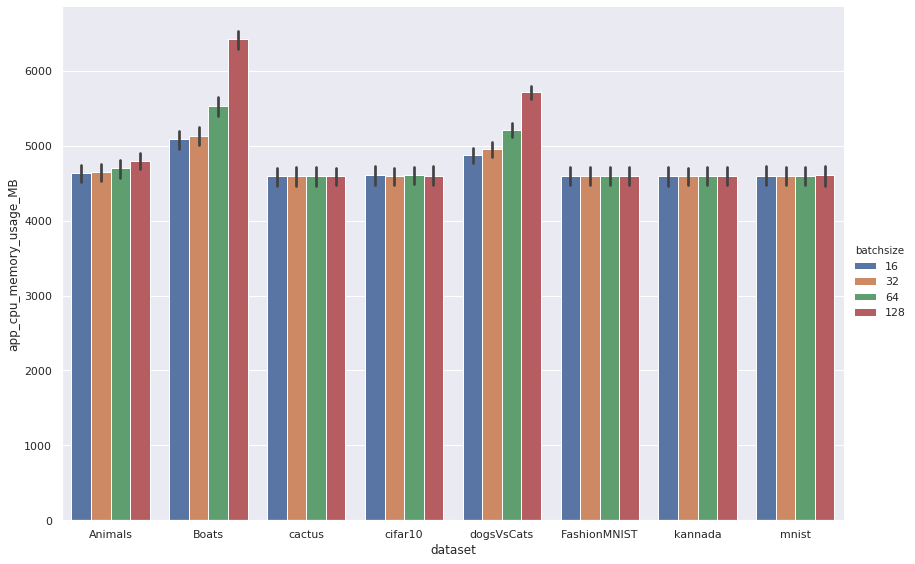

In [44]:
sns.catplot(
    x="dataset",
    y="app_cpu_memory_usage_MB",
    hue="batchsize",
    kind="bar",
    data=memstat_df,
    height=8, aspect=12/8)

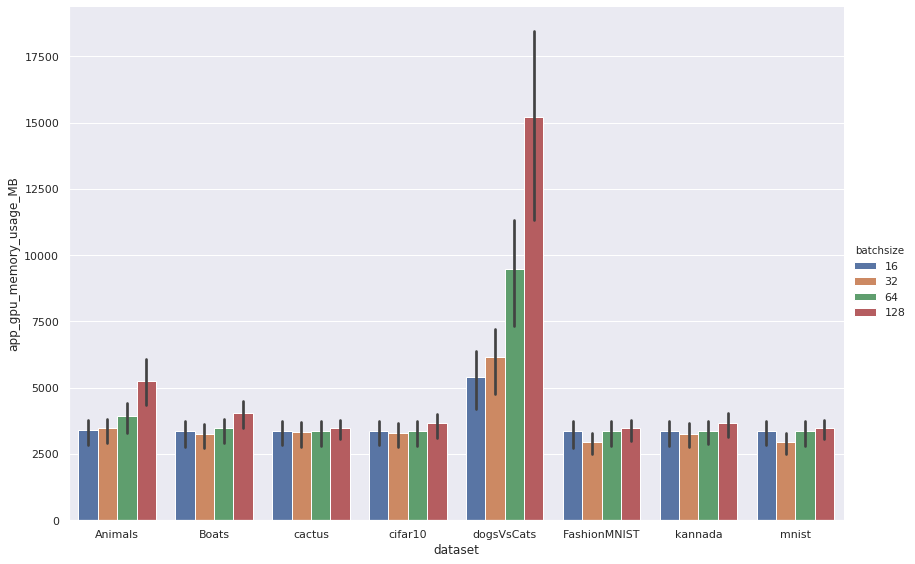

In [45]:
sns.catplot(
    x="dataset",
    y="app_gpu_memory_usage_MB",
    hue="batchsize",
    kind="bar",
    data=memstat_df,
    height=8, aspect=12/8)

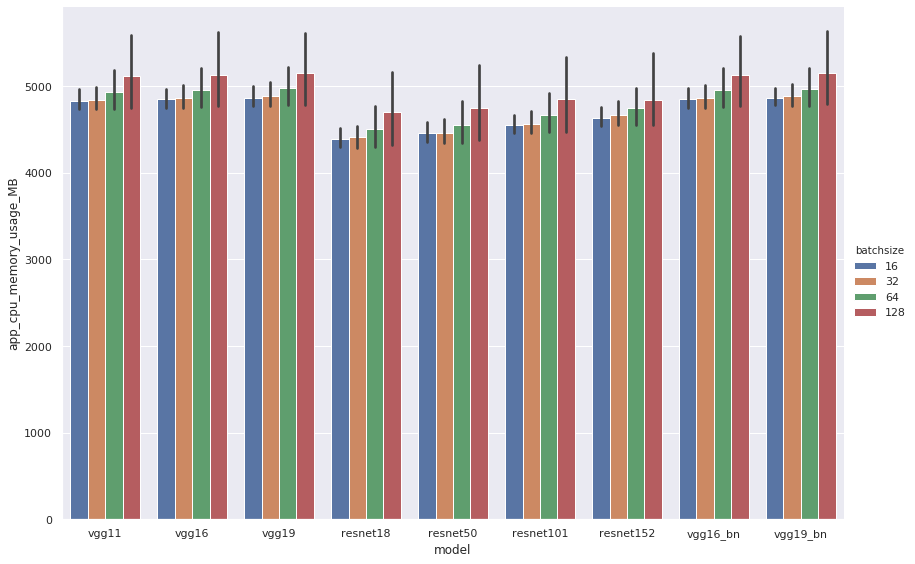

In [47]:
sns.catplot(
    x="model",
    y="app_cpu_memory_usage_MB",
    hue="batchsize",
    kind="bar",
    data=memstat_df,
    height=8, aspect=12/8)

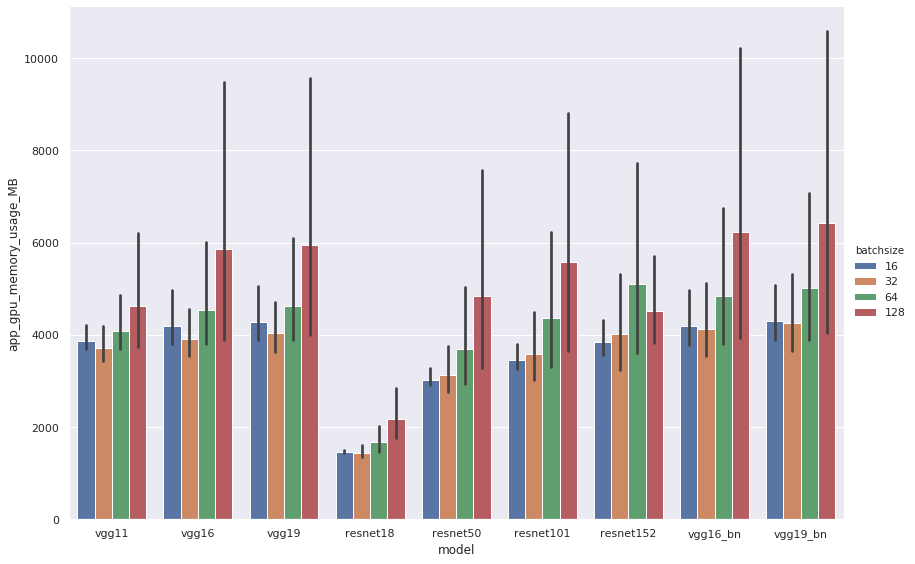

In [46]:
sns.catplot(
    x="model",
    y="app_gpu_memory_usage_MB",
    hue="batchsize",
    kind="bar",
    data=memstat_df,
    height=8, aspect=12/8)